### q1. Create a `data` folder in your local project repository.  

### q2. Download these two CSV files and place them in the data folder:

    a.	Gross Domestic Product (GDP) per capita http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY.GDP.PCAP.PP.KD **DO NOT APPLY ANY FILTERS**
     - rename the file to `gdp_percapita.csv`
     - open it with a text editor (**not excel**) and take a look at the top and bottom, do you notice anything?

    b.	Percentage of Individuals using the Internet http://data.un.org/Data.aspx?d=ITU&f=ind1Code%3aI99H  **DO NOT APPLY ANY FILTERS**
     - rename the file to `internet_use.csv`
     - open it with a text editor (**not excel**) and take a look at the top and bottom, do you notice anything?

### q3.	Import the required packages with their customary aliases as follows:

    `import pandas as pd`   
    `import numpy as np`  
    `import matplotlib.pyplot as plt`  
    `import seaborn as sns`

### q4.	Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [439]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144
...,...,...,...
8214,Zimbabwe,1994,3965.730986
8215,Zimbabwe,1993,3634.750494
8216,Zimbabwe,1992,3649.891947
8217,Zimbabwe,1991,4126.405247


### q5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [443]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         8219 non-null   object 
 1   Year            8219 non-null   int64  
 2   GDP_Per_Capita  8219 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 192.8+ KB


### q6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [ ]:
gdp_df = gdp_df.drop(columns = ['Value Footnotes'])

In [2]:
gdp_df = gdp_df.rename(columns = {'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'})

### q7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

In [3]:
gdp_df.sort_values(by='GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
5161,Mozambique,1992,510.822823
5158,Mozambique,1995,525.418672
4247,Liberia,1995,534.809715
5159,Mozambique,1994,546.209688
5163,Mozambique,1990,547.622781
...,...,...,...
6128,Qatar,2011,145591.019357
4469,"Macao SAR, China",2011,155185.383338
4466,"Macao SAR, China",2014,162582.374111
4468,"Macao SAR, China",2012,164065.103441


In [4]:
#Countries have 11-34 years worth of data
gdp_df.groupby('Country').agg(count=('Country','count')).reset_index().sort_values(by='count')

,Country,count
54,Djibouti,11
229,Turks and Caicos Islands,13
195,Sint Maarten (Dutch part),15
73,Faroe Islands,16
115,Kosovo,16
...,...,...
90,Heavily indebted poor countries (HIPC),34
91,High income,34
92,Honduras,34
79,Georgia,34


In [5]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         8219 non-null   object 
 1   Year            8219 non-null   int64  
 2   GDP_Per_Capita  8219 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 192.8+ KB


### q8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

                         Country  Year  GDP_Per_Capita
0                    Afghanistan  2020     2769.685745
1    Africa Eastern and Southern  2020     3861.111238
2     Africa Western and Central  2020     4622.731427
3                        Albania  2020    14650.395929
4                        Algeria  2020    14194.155748
..                           ...   ...             ...
242               Virgin Islands  2020    45055.782930
243           West Bank and Gaza  2020     5423.682547
244                        World  2020    18600.986362
245                       Zambia  2020     3391.595412
246                     Zimbabwe  2020     2987.269823

[247 rows x 3 columns]


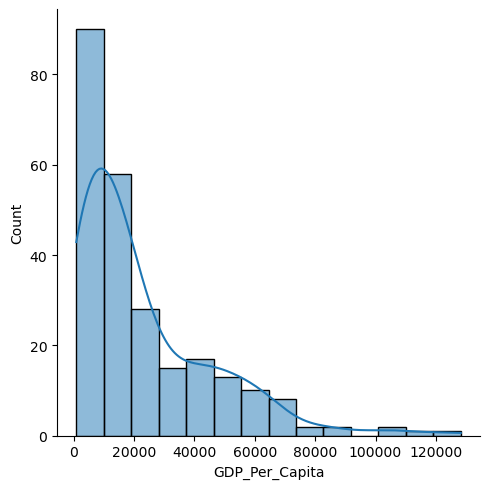

In [33]:
gdp_2020_df = gdp_df[gdp_df.Year == 2020].reset_index(drop = True)

sns.displot( data=gdp_2020_df["GDP_Per_Capita"], kde=True )

print(gdp_2020_df)


<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

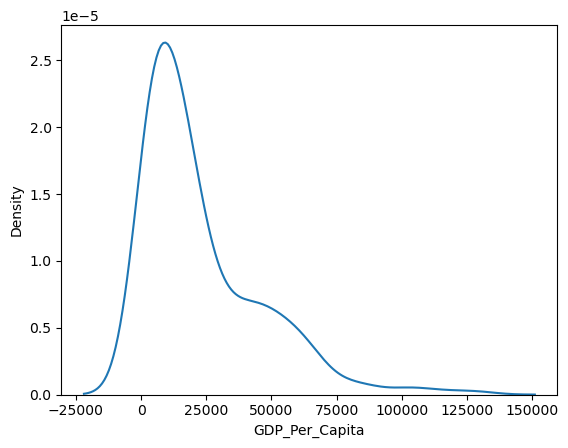

In [35]:
sns.kdeplot(gdp_2020_df['GDP_Per_Capita'])

<Axes: ylabel='GDP_Per_Capita'>

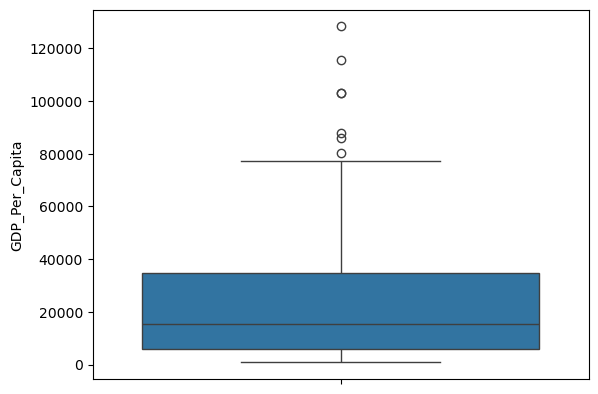

In [39]:
sns.boxplot( y=gdp_2020_df["GDP_Per_Capita"] )

<Axes: ylabel='GDP_Per_Capita'>

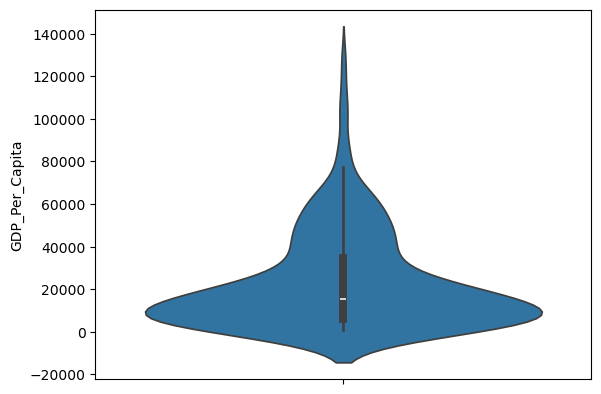

In [41]:
sns.violinplot( y=gdp_2020_df["GDP_Per_Capita"])

### q9. What was the median GDP per capita value in 2020?

In [45]:
gdp_2020_df['GDP_Per_Capita'].median()

15309.23598817024

### q10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [71]:
gdp_decades = gdp_df.loc[(gdp_df.Year == 1990) | (gdp_df.Year == 2000) | (gdp_df.Year == 2010) | (gdp_df.Year == 2020)].reset_index(drop = True)
gdp_decades

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,2769.685745
1,Afghanistan,2010,2848.586061
2,Afghanistan,2000,1617.826475
3,Africa Eastern and Southern,2020,3861.111238
4,Africa Eastern and Southern,2010,3863.836012
...,...,...,...
960,Zambia,1990,2425.111287
961,Zimbabwe,2020,2987.269823
962,Zimbabwe,2010,2572.769992
963,Zimbabwe,2000,4071.022001


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

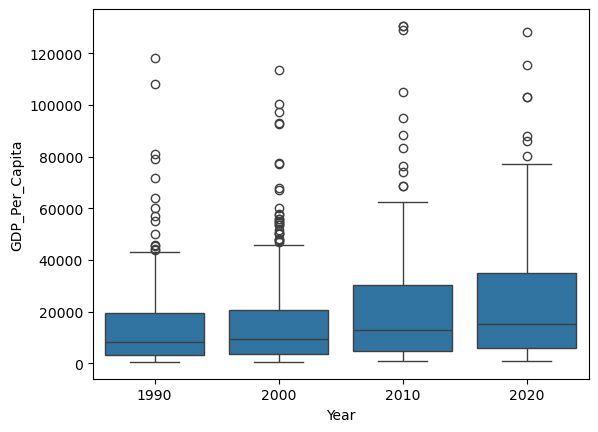

In [73]:
sns.boxplot( x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"] )

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

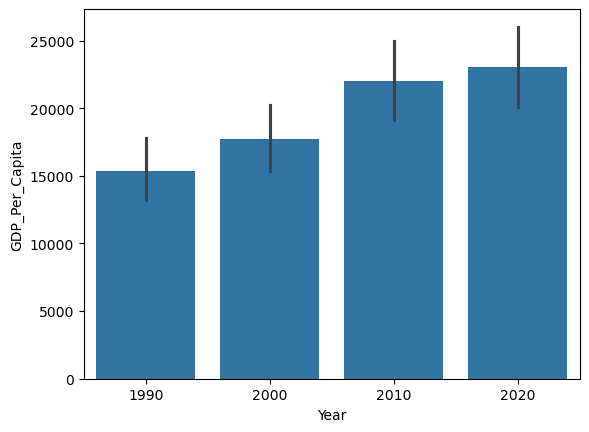

In [75]:
sns.barplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

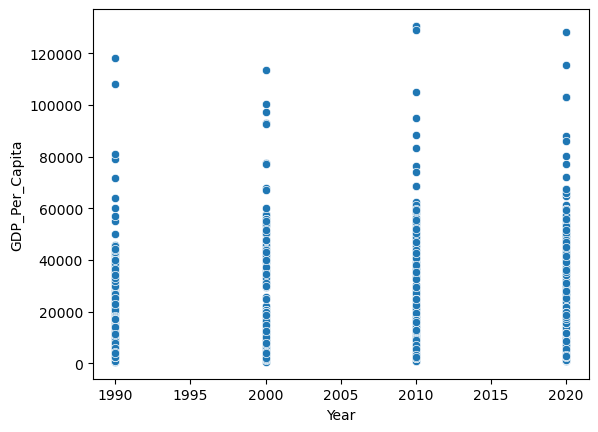

In [77]:
sns.scatterplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"])

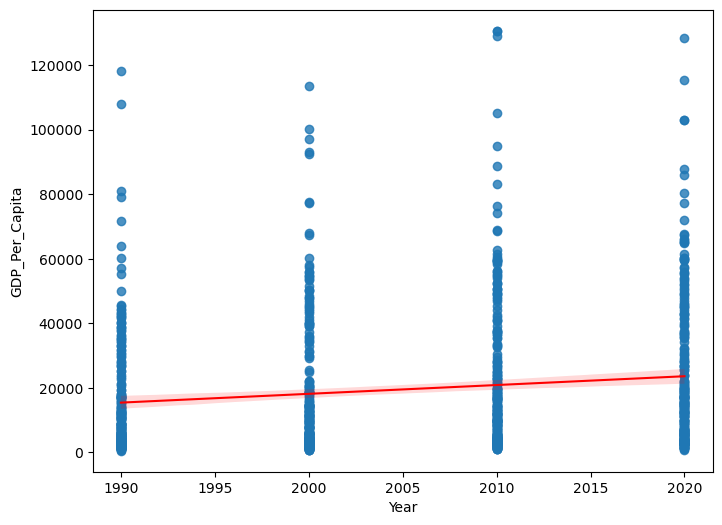

In [83]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(
    x=gdp_decades["Year"],
    y=gdp_decades["GDP_Per_Capita"],
    line_kws={"color": "red", "linewidth": 1.5},
    ax=ax
)
plt.show()

### q11. Which country was the first to have a GDP per capita greater than $100,000?

In [450]:
gdp_df.loc[(gdp_df["GDP_Per_Capita"]>100000) & (gdp_df["Year"]==gdp_df.loc[gdp_df["GDP_Per_Capita"]>100000]["Year"].min())].reset_index(drop = True)

,Country,Year,GDP_Per_Capita
0,Brunei,1990,118163.683198
1,United Arab Emirates,1990,108057.042464


### q12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

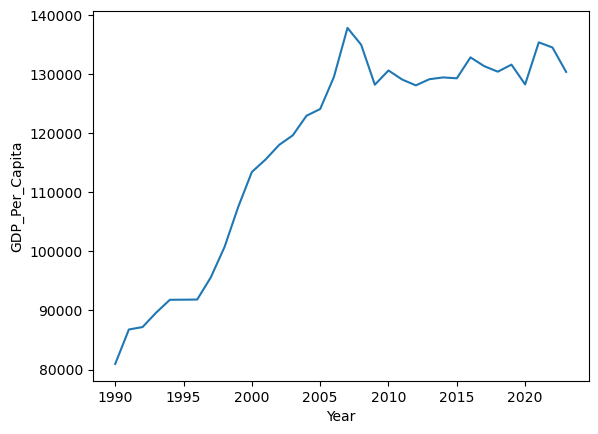

In [159]:
gdp_df.loc[gdp_df["Year"]==2020]["GDP_Per_Capita"].max()

gdp_df.loc[gdp_df["Year"]==2020].sort_values(by="GDP_Per_Capita")

# The highest for 2020 is Luxembourg

lux = gdp_df.loc[gdp_df["Country"]=="Luxembourg"]

sns.lineplot(x=lux["Year"], y=lux["GDP_Per_Capita"])




### q13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

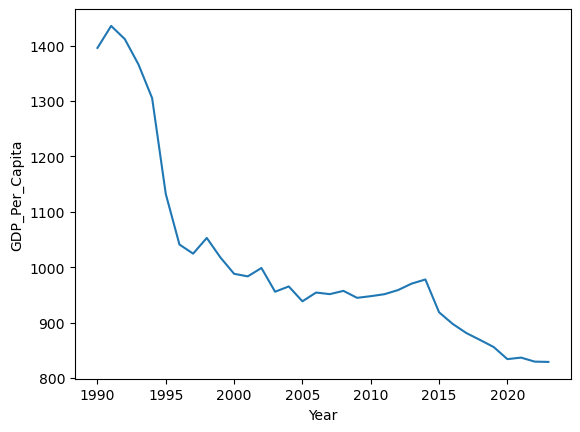

In [163]:
gdp_df.loc[gdp_df["Year"]==2020]["GDP_Per_Capita"].min()

gdp_df.loc[gdp_df["Year"]==2020].sort_values(by="GDP_Per_Capita")

# The lowest for 2020 is Burundi

bur = gdp_df.loc[gdp_df["Country"]=="Burundi"]

sns.lineplot(x=bur["Year"], y=bur["GDP_Per_Capita"])

In [201]:
gdp_2020 = gdp_df.loc[gdp_df["Year"]==2020].drop(columns = "Year").rename(columns = {'GDP_Per_Capita': 'GDP_Per_Capita_2020'})
gdp_1990 = gdp_df.loc[gdp_df["Year"]==1990].drop(columns = "Year").rename(columns = {'GDP_Per_Capita': 'GDP_Per_Capita_1990'})

gdp_1990_2020 = pd.merge(gdp_1990, gdp_2020, on = 'Country', how = 'inner')

gdp_1990_2020["Change"] = gdp_1990_2020["GDP_Per_Capita_2020"] - gdp_1990_2020["GDP_Per_Capita_1990"]

gdp_1990_2020 = gdp_1990_2020.loc[gdp_1990_2020["Change"]<0]
gdp_1990_2020.sort_values(by="Change").reset_index(drop = True)

#Answer: 24 countries had a lower GDP per capita in 2020 than 1990

,Country,GDP_Per_Capita_1990,GDP_Per_Capita_2020,Change
0,United Arab Emirates,108057.042464,65784.676939,-42272.365525
1,Brunei,118163.683198,80280.897948,-37882.785250
2,Nauru,30546.301797,11441.258450,-19105.043347
3,Saudi Arabia,60101.575626,51782.568653,-8319.006973
4,Libya,18121.815655,9976.037403,-8145.778252
5,The Bahamas,33062.545904,25457.080388,-7605.465516
6,Aruba,34579.220640,28521.688852,-6057.531788
7,Ukraine,22815.798828,17092.539062,-5723.259766
8,Gabon,23884.810700,18681.484074,-5203.326626
9,Congo,8699.526839,6350.509134,-2349.017705


### q14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [207]:
internet_usage = pd.read_csv('../data/internet_use.csv', nrows=6083)

internet_usage = internet_usage.drop(columns = ['Value Footnotes'])

In [209]:
internet_usage

,Country or Area,Year,Value
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739


In [219]:
internet_usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6083 entries, 0 to 6082
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6083 non-null   object 
 1   Year             6083 non-null   int64  
 2   Value            6083 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 142.7+ KB


In [215]:
internet_usage.describe()

,Year,Value
count,6083.000000,6083.000000
mean,2007.207135,29.655588
std,8.816584,31.381472
min,1990.000000,0.000000
25%,2000.000000,1.497090
50%,2007.000000,16.551000
75%,2015.000000,55.659950
max,2023.000000,100.000000


### q15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [223]:
internet_usage = internet_usage.rename(columns = {'Country or Area': 'Country', 'Value': 'Internet_Users_Pct'})

In [225]:
internet_usage

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739


### q16. Look at the number of observations in this dataset per year. What do you notice?

<Axes: xlabel='Year', ylabel='count'>

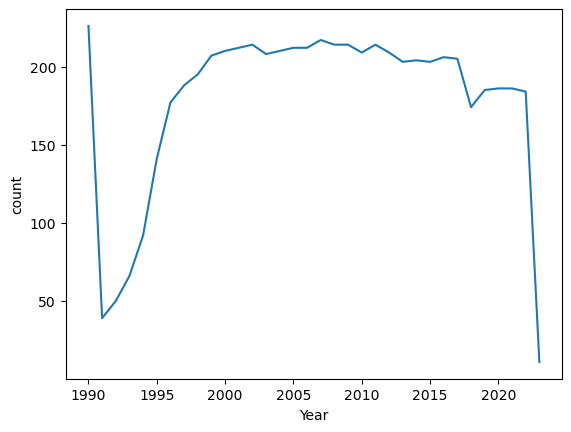

In [243]:
#The most are from 1990?

year_by_year = internet_usage["Year"].value_counts().to_frame().sort_values(by = 'Year').reset_index()

sns.lineplot(x=year_by_year["Year"], y=year_by_year["count"])

### q17. What is the first year to have a non-zero internet users percentage value?

In [253]:
internet_usage.loc[internet_usage["Internet_Users_Pct"]>0].sort_values(["Year","Internet_Users_Pct"], ascending = [True, False])

#Answer: 1990

,Country,Year,Internet_Users_Pct
5810,United States,1990,0.784729
4197,Norway,1990,0.707299
5332,Switzerland,1990,0.595714
306,Australia,1990,0.585095
5299,Sweden,1990,0.584192
...,...,...,...
340,Azerbaijan,2023,88.000000
5586,Türkiye,2023,85.960700
677,Bosnia and Herzegovina,2023,83.377200
1656,Ecuador,2023,72.694300


### q18. How does the distribution of internet users percent differ for 2000 and 2014?

In [269]:
# internet_usage.loc[internet_usage["Year"]==2000].describe()

internet_usage_2000 = internet_usage.loc[internet_usage["Year"]==2000].drop(columns = "Year").rename(columns = {'Internet_Users_Pct': 'Internet_Users_Pct_2000'})
internet_usage_2014 = internet_usage.loc[internet_usage["Year"]==2014].drop(columns = "Year").rename(columns = {'Internet_Users_Pct': 'Internet_Users_Pct_2014'})

internet_usage_2000_2014 = pd.merge(internet_usage_2000, internet_usage_2014, on = 'Country', how = 'inner')

internet_usage_2000_2014.describe()


,Internet_Users_Pct_2000,Internet_Users_Pct_2014
count,195.000000,195.000000
mean,8.924395,46.395884
std,13.518832,29.134617
min,0.005902,0.990000
25%,0.402701,17.730000
50%,2.485570,47.900000
75%,10.127565,70.453800
max,58.620700,98.158000


### q19. For how many countries was the percentage of internet users below 5% in 2014?

In [273]:
internet_usage_2014.loc[internet_usage_2014["Internet_Users_Pct_2014"] < 5]

#10 countries were recorded at < 5% for 2014

,Country,Internet_Users_Pct_2014
873,Burundi,1.04239
1033,Central African Republic,2.70000
1061,Chad,2.90000
1517,Democratic Republic of the Congo,3.00000
1782,Eritrea,0.99000
2451,Guinea-Bissau,3.32000
3364,Madagascar,3.70000
4073,Niger,1.24868
5055,Somalia,1.63000
5116,South Sudan,2.60000


### q20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

In [283]:
gdp_and_internet_use = pd.merge(gdp_df, internet_usage, on = ['Country','Year'], how = 'outer')
gdp_and_internet_use

#should have 8219 or more rows.  Has 9499 rows

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,1990,NaN,0.000000
1,Afghanistan,2000,1617.826475,NaN
2,Afghanistan,2001,1454.110782,0.004723
3,Afghanistan,2002,1774.308743,0.004561
4,Afghanistan,2003,1815.928200,0.087891
...,...,...,...,...
9494,Zimbabwe,2019,3294.806084,26.588300
9495,Zimbabwe,2020,2987.269823,29.298600
9496,Zimbabwe,2021,3184.785451,32.461600
9497,Zimbabwe,2022,3323.121932,32.561500


### q21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

                          Country  Year  GDP_Per_Capita  Internet_Users_Pct
3944                      Iceland  2014    57981.199448              98.158
2867  Falkland (Malvinas) Islands  2014             NaN              97.600
824                       Bermuda  2014    92298.387811              96.800
      Country  Year  GDP_Per_Capita  Internet_Users_Pct
800   Bermuda  1990    79109.890650              0.0000
801   Bermuda  1991    75754.494259                 NaN
802   Bermuda  1992    75160.932166                 NaN
803   Bermuda  1993    76883.813796                 NaN
804   Bermuda  1994    76850.912239                 NaN
...       ...   ...             ...                 ...
3949  Iceland  2019    65065.905682             99.5049
3950  Iceland  2020    59575.190393             99.5328
3951  Iceland  2021    61685.835611             99.6870
3952  Iceland  2022    65563.920870             99.8565
3953  Iceland  2023    66880.065810                 NaN

[91 rows x 4 columns]
 

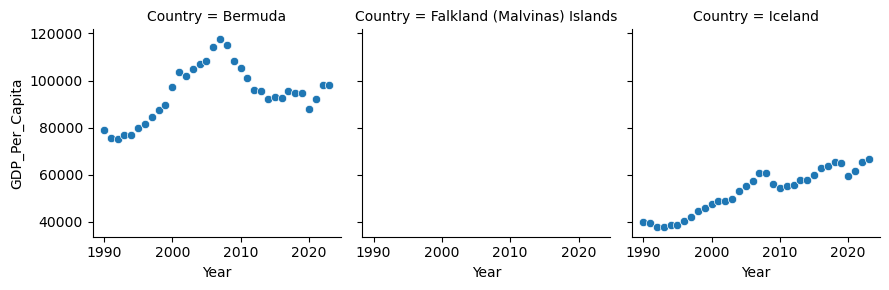

In [317]:
q21_top3 = gdp_and_internet_use[gdp_and_internet_use["Year"]==2014].sort_values(by = "Internet_Users_Pct", ascending = False).head(3)
print(q21_top3)

q21_top3 = gdp_and_internet_use[gdp_and_internet_use["Country"].isin(["Iceland", "Falkland (Malvinas) Islands", "Bermuda"])]
print(q21_top3)
print(q21_top3[q21_top3["Country"]=='Falkland (Malvinas) Islands'])

g = sns.FacetGrid(q21_top3, col="Country")
g.map(sns.scatterplot, "Year", "GDP_Per_Capita")

### q22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.

In [321]:
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use.Year==2014].reset_index(drop = True)
gdp_and_internet_use_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2014,3017.942544,7.0000
1,Africa Eastern and Southern,2014,4052.851526,NaN
2,Africa Western and Central,2014,4816.917355,NaN
3,Albania,2014,12788.747231,54.3000
4,Algeria,2014,15073.762940,29.5000
...,...,...,...,...
280,West Bank and Gaza,2014,5990.426615,NaN
281,World,2014,17307.606891,NaN
282,Yemen,2014,NaN,22.5500
283,Zambia,2014,3585.577485,6.5000


### q23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

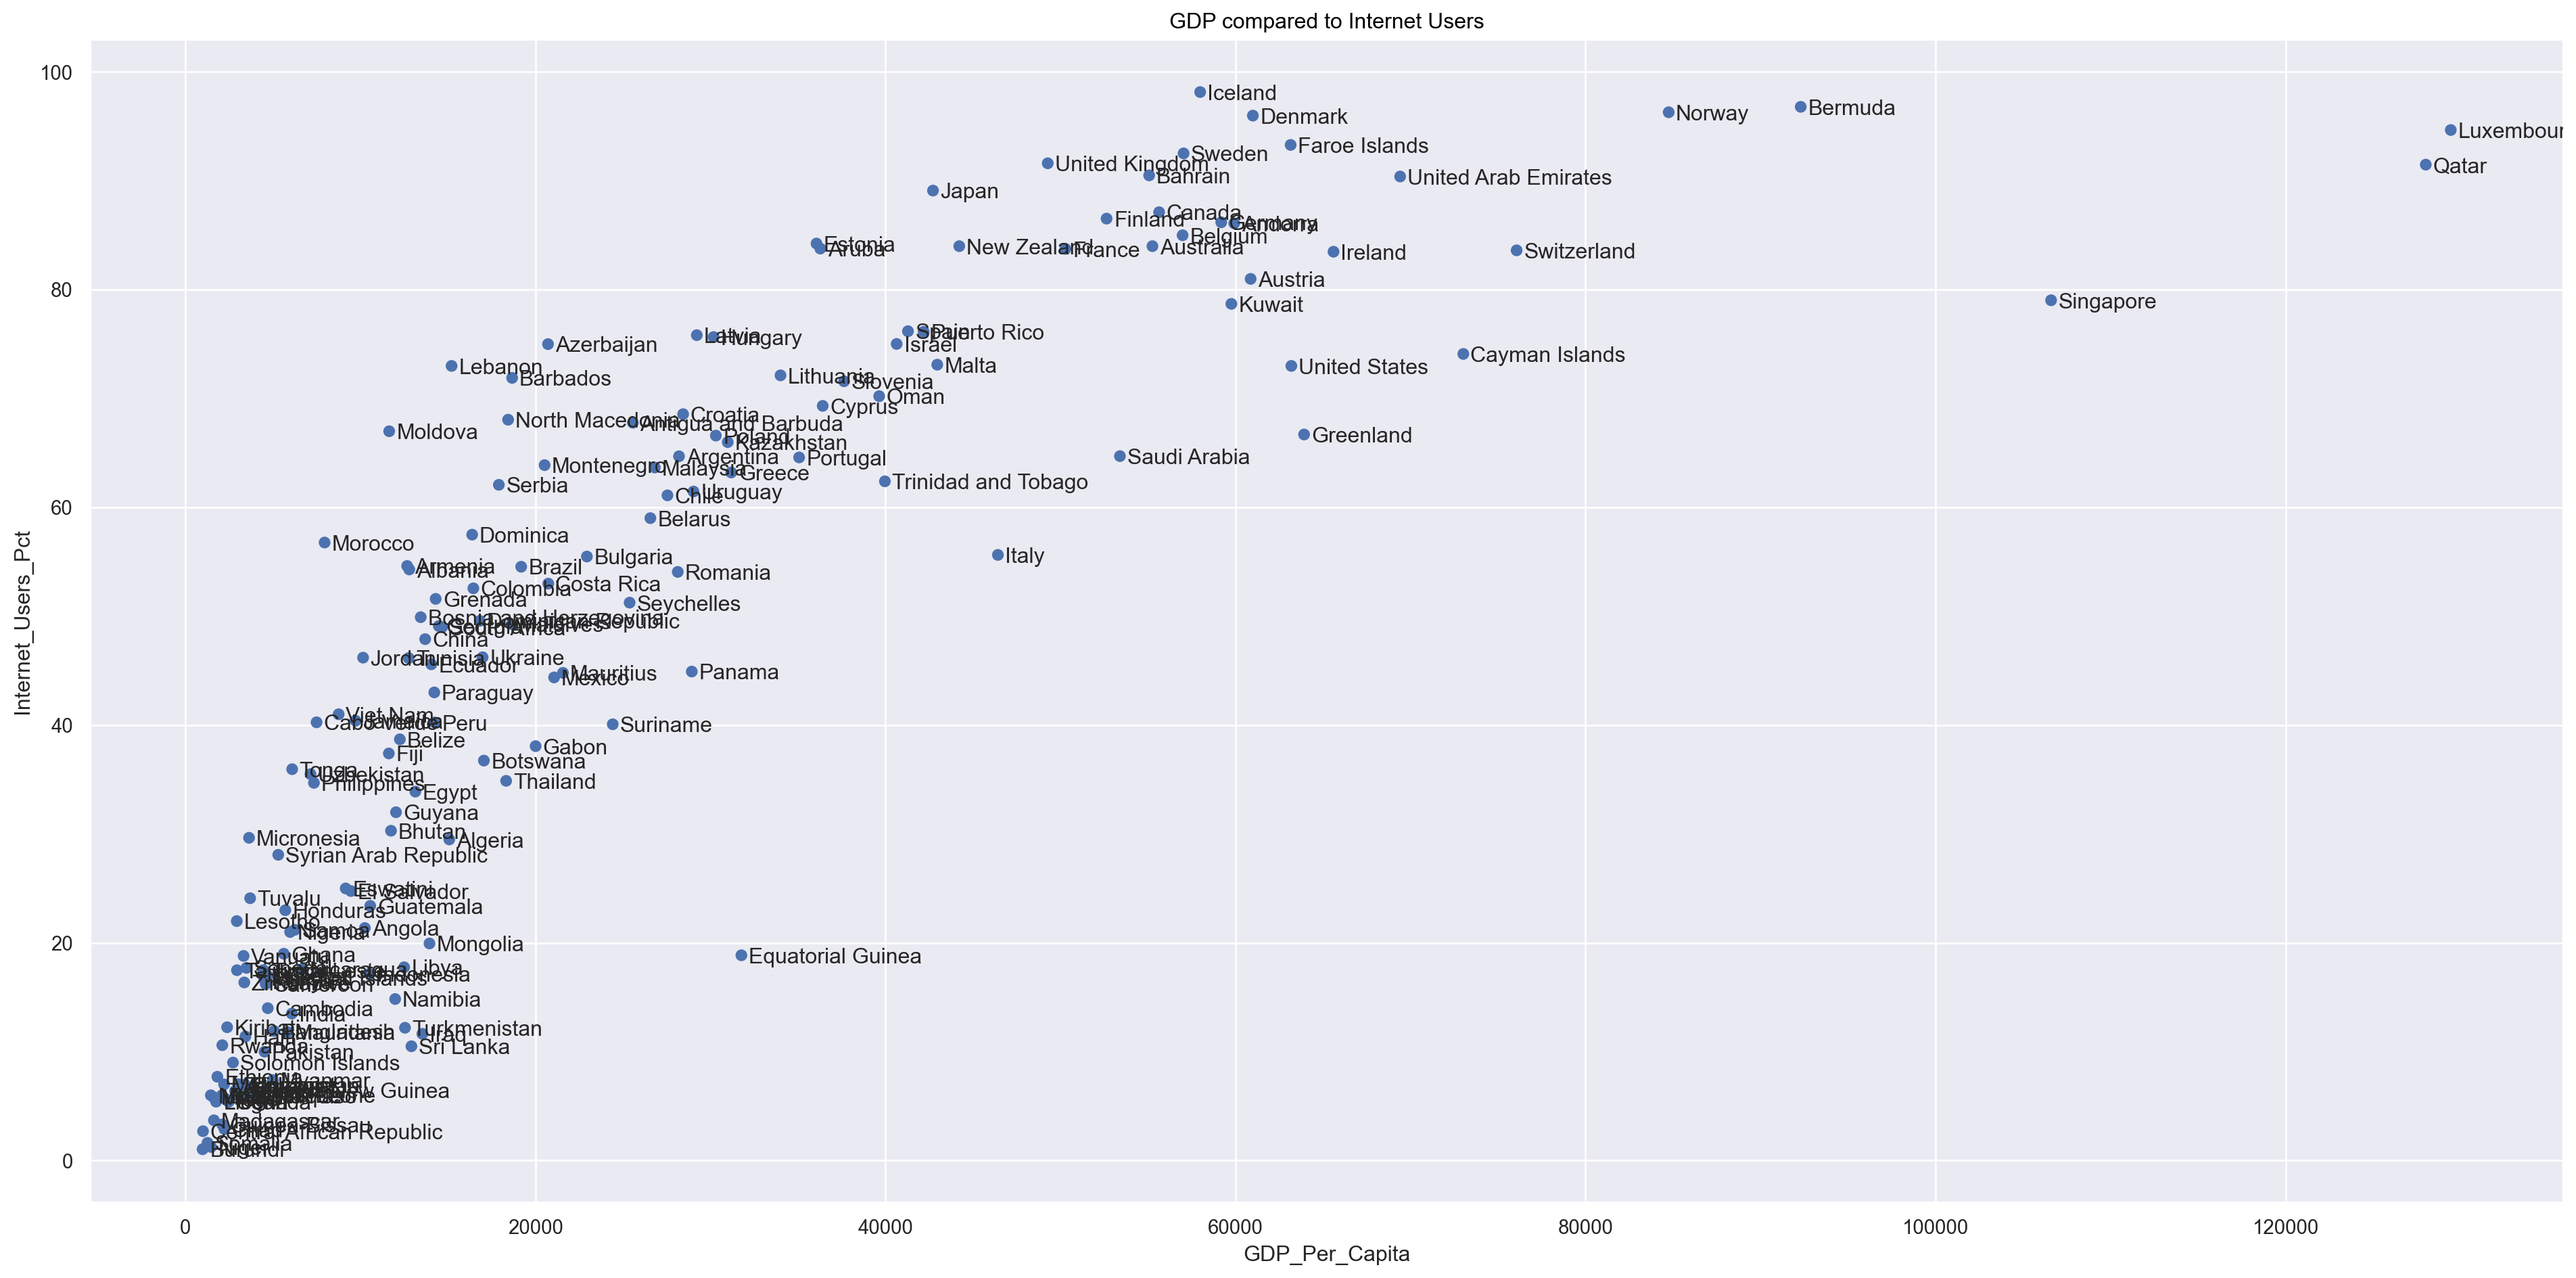

In [388]:
import seaborn.objects as so

(
    so.Plot(gdp_and_internet_use_2014, x="GDP_Per_Capita", y="Internet_Users_Pct", text="Country")
        .add(so.Dot())
        .add(so.Text(halign="left"))
        .label(title="GDP compared to Internet Users", x="GDP_Per_Capita", y="Internet_Users_Pct")
        .layout(size=(20, 10))
)

# I found the way to add labels from Stack Overflow

### q24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

In [362]:
gdp_and_internet_use_2014['GDP_group'] = pd.qcut(gdp_and_internet_use_2014.GDP_Per_Capita, q=3, labels=['Low',
                                'Medium',
                                'High'])

In [402]:
gdp_and_internet_use_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,GDP_group
0,Afghanistan,2014,3017.942544,7.0000,Low
1,Africa Eastern and Southern,2014,4052.851526,NaN,Low
2,Africa Western and Central,2014,4816.917355,NaN,Low
3,Albania,2014,12788.747231,54.3000,Medium
4,Algeria,2014,15073.762940,29.5000,Medium
...,...,...,...,...,...
280,West Bank and Gaza,2014,5990.426615,NaN,Low
281,World,2014,17307.606891,NaN,Medium
282,Yemen,2014,NaN,22.5500,NaN
283,Zambia,2014,3585.577485,6.5000,Low


### q25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?

In [394]:
print("Low:")
gdp_and_internet_use_2014[gdp_and_internet_use_2014["GDP_group"] == "Low"].Internet_Users_Pct.median()

Low:


11.600000000000001

In [396]:
print("Medium:")
gdp_and_internet_use_2014[gdp_and_internet_use_2014["GDP_group"] == "Medium"].Internet_Users_Pct.median()

Medium:


44.5945

In [398]:
print("High:")
gdp_and_internet_use_2014[gdp_and_internet_use_2014["GDP_group"] == "High"].Internet_Users_Pct.median()

High:


75.97999999999999

In [392]:
median_by_category = gdp_and_internet_use_2014.groupby('GDP_group', observed=True)['Internet_Users_Pct'].median()
median_by_category

GDP_group
Low       11.6000
Medium    44.5945
High      75.9800
Name: Internet_Users_Pct, dtype: float64